In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sm
import scipy.integrate as spi

#### №1 Решить нелинейное уравнение по следующему плану:
##### ◦ Построить график функции. Определить интервалы, в которых находится единственный корень..
##### ◦ Проверить сходимость каждого метода.
##### ◦ В каждом интервале найти корень с точностью до 0.001 пользуясь следующими методами: методом половинного деления, методом хорд, методом последовательных приближений.
##### ◦ Стоп по условию ∣ xn−xn−1∣< ϵ или ∣ f (xn)∣< ϵ
##### ◦ Для каждого метода вывести количество итераций, вывести таблицу итераций(можно оформить с помощью PrettyTable или Pandas).
##### ◦ Проверить найденные решения с помощью метода solve

$$ x^3 - 1,89*x^2 - 2x + 1,76 $$

   right    left  iteration
0  0.000 -2.0000          0
1 -1.000 -2.0000          1
2 -1.000 -1.5000          2
3 -1.000 -1.2500          3
4 -1.125 -1.2500          4
5 -1.125 -1.1875          5
       left  right      f(x)  iteration
0 -2.000000      0 -1.130000          0
1 -0.304498      0  2.165524          1
2  1.321541      0 -1.875878          2
3  0.639711      0 -0.031078          3
4  0.628611      0  0.004338          4
   left     right      f(x)  iteration
0     0  2.000000 -1.130000          0
1     0  2.737705  2.638162          1
2     0  2.477443  0.410676          2
3     0  2.419178  0.018617          3
    left  right      f(x)  iteration
0      2      4  5.750000          0
1      2      4  4.987867          1
2      2      4  4.363949          2
3      2      4  3.845802          3
4      2      4  3.410211          4
5      2      4  3.040154          5
6      2      4  2.722888          6
7      2      4  2.448699          7
8      2      4  2.210058          8

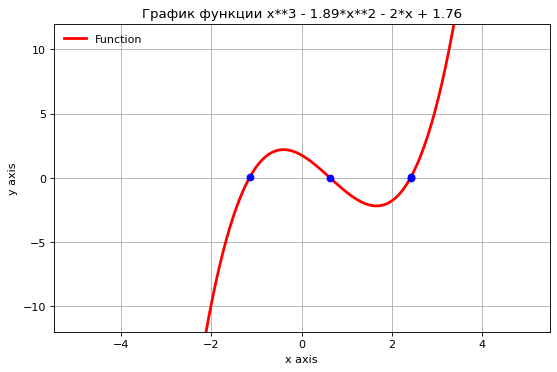

In [17]:
def func(x):
    return x**3 - 1.89*x**2 - 2*x + 1.76

def first_func_derivative(x):
    return 3*x**2 - 1.89*2*x - 2

def second_func_derivative(x):
    return 6*x - 1.89*2

def half_division_method(left, right):
    iterations = 0
    table = [[]]
    table[0] = [right, left, iterations]
    while True:
        middle = (right + left) / 2
        if func(left) * func(middle) < 0:
            right = middle
        elif func(right) * func(middle) < 0:
            left = middle
        if abs(func(middle)) < 0.001:
            break
        iterations += 1
        table.append([right, left, iterations])
    df = pd.DataFrame(table, columns=['right', 'left', 'iteration'])
    print(df)
    return (right + left) / 2


def khord_method(left, right):
    iterations = 0
    table = [[]]
    table[0] = [left, right, func((right - left) / 2), 0]
    if second_func_derivative(left) * func(left) < 0:
        x = right
        while True:
            x_new = x - func(x) / (func(x) - func(left)) * (x - left)
            if abs(func(x_new)) < 0.001:
                x = x_new
                break
            x = x_new
            iterations += 1
            table.append([left, x, func(x), iterations])
    else:
        x = left 
        while True:
            x_new = x - func(x) / (func(right) - func(x)) * (right - x)
            if abs(func(x_new)) < 0.001:
                x = x_new
                break
            x = x_new
            iterations += 1
            table.append([x, right, func(x), iterations])
    df = pd.DataFrame(table, columns=['left', 'right', 'f(x)', 'iteration'])
    print(df)
    return x


def neuton_method(left, right):
    iterations = 0
    table = [[]]
    table[0] = [left, right, func((right - left) / 2), 0]
    if second_func_derivative(left) * func(left) < 0:
        x = right
        while True:
            x_new = x - func(x) / first_func_derivative(x)
            if abs(func(x_new)) < 0.001:
                x = x_new
                break
            x = x_new
            iterations += 1
            table.append([left, x, func(x), iterations])
    else:
        x = left 
        while True:
            x_new = x - func(x) / first_func_derivative(x)
            if abs(func(x_new)) < 0.001:
                x = x_new
                break
            x = x_new
            iterations += 1
            table.append([x, right, func(x), iterations])
    df = pd.DataFrame(table, columns=['left', 'right', 'f(x)', 'iteration'])
    print(df)
    return x

def Fu(x):
    alpha=0.01
    return x - alpha * func(x)

# Метод последовательных приближений
def fixed_point_iteration(left, right):
    iterations = 0
    table = []

    # Выбор начального приближения
    x = (left + right) / 2

    while True:
        x_new = Fu(x)
        table.append([left, right, func(x), iterations])

        if abs(x_new - x) < 0.001:
            x = x_new
            break

        x = x_new
        iterations += 1

    df = pd.DataFrame(table, columns=['left', 'right', 'f(x)', 'iteration'])
    print(df)
    return x



fig = plt.figure(figsize=(8, 5), dpi=80); # А как иначе я определю интервалы
X = np.linspace(-5, 5, 256, endpoint=True);
F = X**3 - 1.89*X**2 - 2*X + 1.76;
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function");
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-12, 12)
result0 = half_division_method(-2, 0) # метод половинного деления реализован
plt.plot(result0, func(result0), color="blue", marker="o")
result1 = khord_method(-2, 0) # метод хорд стоит
plt.plot(result1, func(result1), color="blue", marker="o")
result2 = neuton_method(0, 2) # метод ньютона стоит
plt.plot(result2, func(result2), color="blue", marker="o")
result3 = fixed_point_iteration(2, 4) # метод последовательных приближений стоит
plt.plot(result3, func(result3), color="blue", marker="o")
plt.title('График функции x**3 - 1.89*x**2 - 2*x + 1.76')
plt.legend(loc='upper left', frameon=False);
plt.grid();
plt.show();

# print("bin_search")
# x = half_division_method(-4, -3)
# print(f"x={x}, y(x)={func(x)}")

## Задание 2
Решить систему нелинейных уравнений методом Ньютона с точностью до 0,001.

$$ \begin{equation*}
 \begin{cases}
cos(x+0.5) - y = 2\\
sin(y)-2x =1
 \end{cases}
\end{equation*} $$

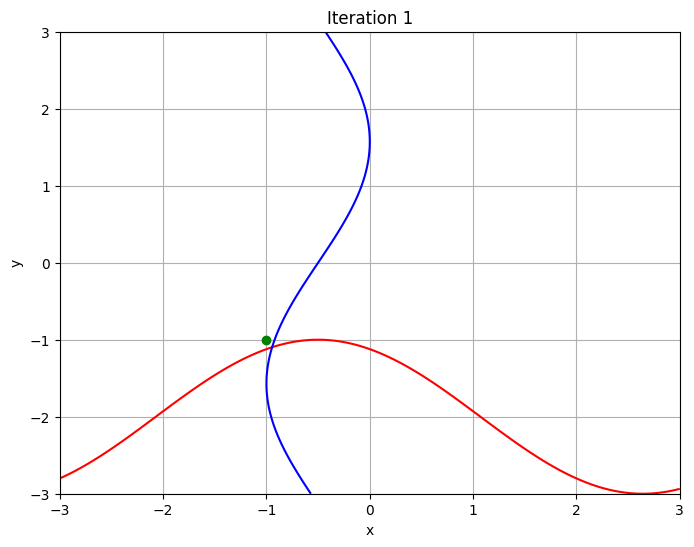

Начальное приближение: x0 = -1, y0 = -1
Матрица Якоби:
[[ 0.47942554 -1.        ]
 [-2.          0.54030231]]
F(x, y):
[-0.12241744  0.15852902]
Решение линейной системы:
[ 0.0530663 -0.0969761]
Новое приближение (Крамер): x = -0.9469336968539298, y = -1.0969760971420885
0.1105458997272283


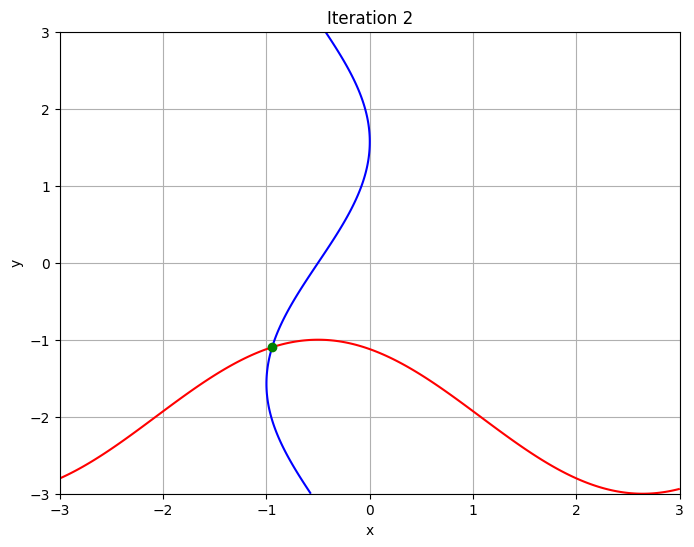

Начальное приближение: x0 = -0.9469336968539298, y0 = -1.0969760971420885
Матрица Якоби:
[[ 0.43220245 -1.        ]
 [-2.          0.45628897]]
F(x, y):
[-0.0012473   0.00403574]
Решение линейной системы:
[ 0.00192291 -0.00041621]
Новое приближение (Крамер): x = -0.945010785015907, y = -1.0973923094397453
0.001967440625159782


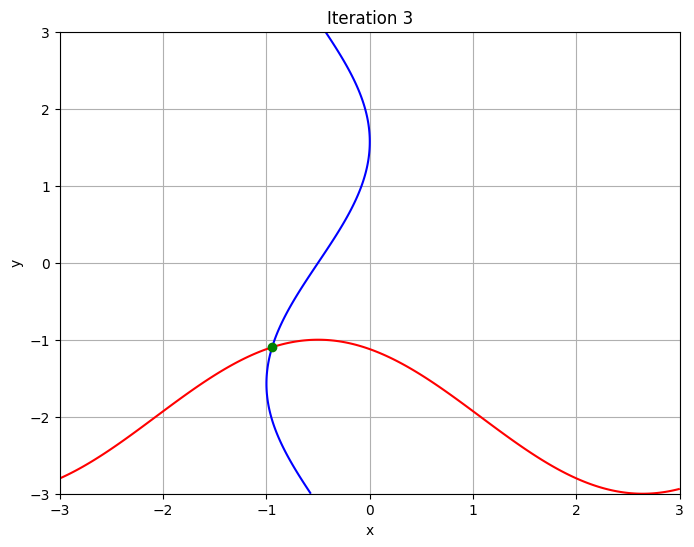

Начальное приближение: x0 = -0.945010785015907, y0 = -1.0973923094397453
Матрица Якоби:
[[ 0.43046761 -1.        ]
 [-2.          0.45591857]]
F(x, y):
[-1.66771170e-06  7.70794419e-08]
Решение линейной системы:
[-3.78802157e-07 -1.83077376e-06]
Новое приближение (Крамер): x = -0.9450111638180638, y = -1.0973941402135092
1.8695517239998861e-06
   Iteration         x         y     x_new     y_new
0          0 -1.000000 -1.000000 -0.946934 -1.096976
1          1 -0.946934 -1.096976 -0.945011 -1.097392
2          2 -0.945011 -1.097392 -0.945011 -1.097394
Решение: (-0.9450111638180638, -1.0973941402135092)


In [26]:
# fig = plt.figure(figsize=(8, 5), dpi=80);
# X = np.linspace(-5, 5, 256, endpoint=True);
# F = 1 - np.sin(X) / 2;
# G = 1 + np.arccos(0.7 - 2*X)
# plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="1 - np.sin(X) / 2");
# plt.plot(X, G, color="orange", linewidth=2.5, linestyle="-", label="1 + np.arccos(0.7 - 2*X)")
# plt.xlabel('x axis')
# plt.ylabel('y axis')
# plt.ylim(0, 3)
# #plt.plot(bin_search(-4, -3), func(bin_search(-4, -3)), color="blue", marker="o")
# #plt.plot(bin_search(-3, 0), func(bin_search(-4, -3)), color="blue", marker="o")
# #plt.plot(bin_search(0, 2), func(bin_search(-4, -3)), color="blue", marker="o")
# plt.legend(loc='upper left', frameon=False);
# plt.grid();
# plt.show();

def f1(x, y):
    return np.cos(x + 0.5) - y - 2

def f2(x, y):
    return np.sin(y) - 2 * x - 1

# def d1_dx(x):
#     return -np.sin(x + 0.5)

# def d1_dy():
#     return -1

# def d2_dx():
#     return -2

# def d2_dy(y):
#     return np.cos(y)

# Производные функций
def jacobian(x, y):
    df1_dx = -np.sin(x + 0.5)
    df1_dy = -1
    df2_dx = -2
    df2_dy = np.cos(y)
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

def stop(x_i, x_i_next, y_i, y_i_next):
    print(math.sqrt(pow((x_i - x_i_next), 2) + pow((y_i - y_i_next), 2)))
    return math.sqrt(pow((x_i - x_i_next), 2) + pow((y_i - y_i_next), 2)) < 0.001

# Метод Ньютона
def newton_method(x0, y0):
    x, y = x0, y0
    iterations = 0
    table = []
    
    while True:
        # Построение графиков функций
        plt.figure(figsize=(8, 6))
        x_vals = np.linspace(-3, 3, 400)
        y_vals = np.linspace(-3, 3, 400)
        X, Y = np.meshgrid(x_vals, y_vals)
        F1 = f1(X, Y)
        F2 = f2(X, Y)
        plt.contour(X, Y, F1, levels=[0], colors='red')
        plt.contour(X, Y, F2, levels=[0], colors='blue')
        plt.plot(x, y, 'go')  # Точка текущего приближения
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Iteration {iterations + 1}')
        plt.grid()
        plt.show()
        
        # Определение начального приближения
        print(f"Начальное приближение: x0 = {x}, y0 = {y}")
        
        J = jacobian(x, y)
        print("Матрица Якоби:")
        print(J)
        
        F = np.array([f1(x, y), f2(x, y)])
        print("F(x, y):")
        print(F)
        
        if np.linalg.det(J) == 0:
            raise ValueError("Jacobian determinant is zero. Newton's method fails.")
        
        # Составление системы линейных уравнений
        delta = np.linalg.solve(J, -F)
        print("Решение линейной системы:")
        print(delta)
        
        # Решение линейной системы методом Крамера
        delta_x, delta_y = delta[0], delta[1]
        x_new, y_new = x + delta_x, y + delta_y
        print(f"Новое приближение (Крамер): x = {x_new}, y = {y_new}")
        
        table.append([iterations, x, y, x_new, y_new])
        
        # Проверка условия сходимости
        if stop(x, x_new, y, y_new):
            x, y = x_new, y_new
            break
        
        x, y = x_new, y_new
        iterations += 1

    df = pd.DataFrame(table, columns=['Iteration', 'x', 'y', 'x_new', 'y_new'])
    print(df)
    return x, y

# Начальное приближение
x0, y0 = -1, -1

# Решение методом Ньютона
solution = newton_method(x0, y0)
print("Решение:", solution)